In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_blobs(
    n_samples = 500,
    centers = 3,
    n_features = 2,
    cluster_std = 0.60,
    random_state = 42
)

In [3]:
df = pd.DataFrame(X, columns = ["Feature1", "Feature2"])

In [4]:
df.head()

,Feature1,Feature2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324


In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [6]:
df_scaled

array([[-9.69818350e-01, -1.33993820e+00],
       [ 9.63343617e-01,  8.22475346e-02],
       [ 1.57864695e+00,  1.26351772e-02],
       [-2.46735247e-01,  1.03557927e+00],
       [ 1.45416962e+00,  4.95852224e-02],
       [ 1.40747082e+00,  8.22344111e-03],
       [-7.92177264e-01, -1.28388698e+00],
       [ 1.33697413e+00,  8.26220693e-02],
       [ 1.16849128e+00,  7.41152400e-02],
       [-1.19320161e+00, -1.27260956e+00],
       [ 1.22150712e+00, -1.25922376e-02],
       [-5.14797137e-02,  1.09492794e+00],
       [ 7.12157877e-02,  9.90472440e-01],
       [-1.25480095e-01,  1.27553591e+00],
       [ 1.33940654e+00,  2.78868839e-01],
       [ 1.43619041e+00, -7.51130357e-02],
       [-2.06430378e-01,  1.26334617e+00],
       [-1.25589470e+00, -1.23971291e+00],
       [-1.10416740e+00, -1.17664933e+00],
       [-3.36666506e-01,  1.06025816e+00],
       [ 1.12682035e+00,  1.39235617e-01],
       [-1.71064404e-01,  9.89772412e-01],
       [ 1.37551647e+00,  1.15995990e-01],
       [-9.

In [7]:
inertia = []
K_range = range(1, 11)

In [8]:
for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

In [9]:
inertia

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

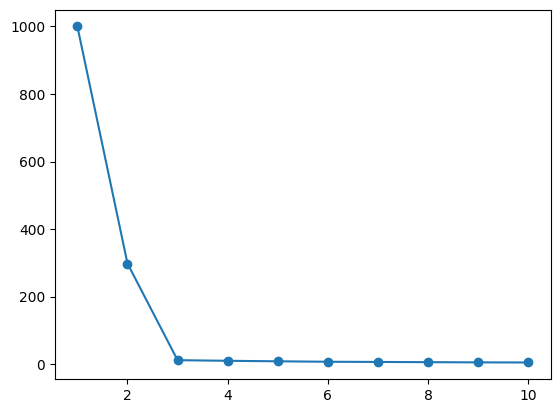

In [10]:
plt.plot(K_range, inertia, marker = "o")

In [11]:
kmeans_final = KMeans(n_clusters = 3, random_state = 42)

In [12]:
cluster_labels = kmeans_final.fit_predict(df_scaled)

In [13]:
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [14]:
df["Clusters"] = cluster_labels

<Axes: xlabel='Feature1', ylabel='Feature2'>

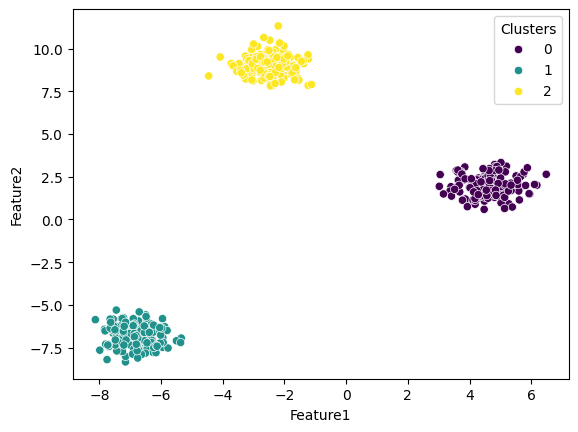

In [15]:
sns.scatterplot(
    x = df["Feature1"],
    y = df["Feature2"],
    hue = df["Clusters"],
    palette = "viridis"
)

In [16]:
from sklearn.datasets import make_moons

In [17]:
X, y = make_moons(
    n_samples = 500,
    noise = 0.2,
    random_state = 42
)

In [18]:
df = pd.DataFrame(X, columns = ["Feature1", "Feature2"])

In [19]:
X_scaled = scaler.fit_transform(df)

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
db_scan = DBSCAN(
    eps = 0.3,
    min_samples = 5
)

In [22]:
db_scan_labels = db_scan.fit_predict(X_scaled)

In [23]:
df["dbscan_cluster"] = db_scan_labels

<Axes: xlabel='Feature1', ylabel='Feature2'>

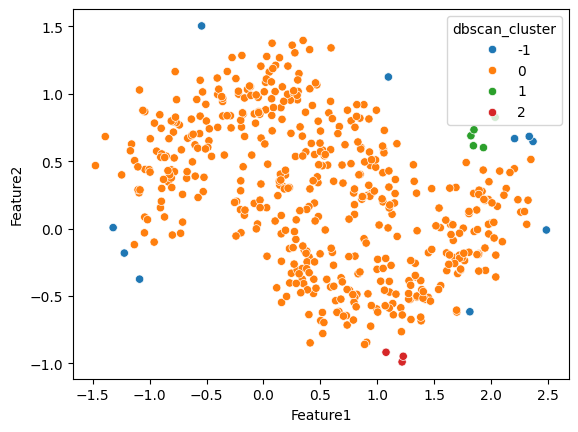

In [24]:
sns.scatterplot(
    x = df["Feature1"],
    y = df["Feature2"],
    hue = df["dbscan_cluster"],
    palette = "tab10"
)